# Logistic regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import math

from utils import DataHandlerTitantic

Load the data and split into train and validation sets.

In [2]:
dh = DataHandlerTitantic(34545234)
dh.load_data("data/train.csv", "data/test.csv")
dh.shuffle_split()
dh.full_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Gender and socio-economic status

Convert the 'Sex' column into an integer one, and replace 'Pclass' with a categorical one.

In [3]:
dh1 = dh.to_is_female().make_dummies(["Pclass"])
dh1.train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.000,B96 B98,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.500,B50,C
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.250,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.250,NaN,S
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.125,NaN,S


In [5]:
features = ["IsFemale", "Pclass_1", "Pclass_2", "Pclass_3"]
X = dh1.train[features]
y = dh1.train["Survived"]

Specify the model. We normalise the data and then apply logistic regression.

In [6]:
model1 = make_pipeline(StandardScaler(), 
                       LogisticRegression(solver="liblinear"))
print(model1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])


Use cross validation to pick the best value for the `C` parameter.

In [7]:
power_range = np.arange(-5,5)
tuned_parameters = [{"logisticregression__C": np.power(10.0, power_range)}]

clf = GridSearchCV(model1, tuned_parameters)
clf.fit(X, y)

results = pd.DataFrame(clf.cv_results_)

print("Best parameters:")
print()
print(clf.best_params_)
print()

results

Best parameters:

{'logisticregression__C': 1.0}



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005042,0.000350,0.002218,0.000201,0.00001,{'logisticregression__C': 1e-05},0.701863,0.7500,0.81875,0.7875,0.70625,0.752873,0.045437,8
1,0.006125,0.001769,0.002524,0.000821,0.0001,{'logisticregression__C': 0.0001},0.701863,0.7500,0.81875,0.7875,0.70000,0.751623,0.046769,9
2,0.006440,0.000751,0.002687,0.000574,0.001,{'logisticregression__C': 0.001},0.701863,0.7625,0.81875,0.7875,0.70000,0.754123,0.046949,7
3,0.005800,0.000643,0.002317,0.000460,0.01,{'logisticregression__C': 0.01},0.701863,0.7750,0.76875,0.8125,0.70000,0.751623,0.044015,9
4,0.005926,0.001298,0.002761,0.001093,0.1,{'logisticregression__C': 0.1},0.763975,0.7750,0.76875,0.8125,0.70000,0.764045,0.036309,6
5,0.006341,0.000436,0.002783,0.000232,1.0,{'logisticregression__C': 1.0},0.763975,0.7750,0.76875,0.8125,0.79375,0.782795,0.017970,1
6,0.005479,0.000355,0.002205,0.000207,10.0,{'logisticregression__C': 10.0},0.763975,0.7750,0.76875,0.8125,0.79375,0.782795,0.017970,1
7,0.005048,0.000203,0.001916,0.000078,100.0,{'logisticregression__C': 100.0},0.763975,0.7750,0.76875,0.8125,0.79375,0.782795,0.017970,1
8,0.005399,0.000335,0.002098,0.000306,1000.0,{'logisticregression__C': 1000.0},0.763975,0.7750,0.76875,0.8125,0.79375,0.782795,0.017970,1
9,0.005858,0.000798,0.002390,0.000472,10000.0,{'logisticregression__C': 10000.0},0.763975,0.7750,0.76875,0.8125,0.79375,0.782795,0.017970,1


Plot the mean test scores against the log of the `C` value.

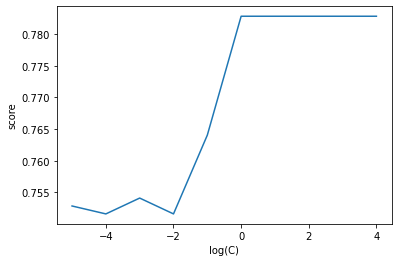

In [8]:
fig, ax = plt.subplots()
ax.plot(power_range, results["mean_test_score"])
ax.set_xlabel("log(C)")
ax.set_ylabel("score")
plt.show()

Now fit the model.

In [9]:
model1.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

Print the train and evaluation accuracies.

In [10]:
score_train = model1.score(X, y)
X_eval = dh1.eval[features]
y_eval = dh1.eval["Survived"]
score_eval = model1.score(X_eval, y_eval)

print(f"Train accuracy: {score_train}")
print(f"Evaluation accuracy: {score_eval}")

Train accuracy: 0.7827715355805244
Evaluation accuracy: 0.8222222222222222
